In [1]:
using Pkg
Pkg.status()
VERSION

Status `~/.julia/environments/v1.9/Project.toml`
⌅ [7d9fca2a] Arpack v0.5.3
  [6e4b80f9] BenchmarkTools v1.5.0
  [861a8166] Combinatorics v1.0.2
⌃ [a93c6f00] DataFrames v1.6.1
  [864edb3b] DataStructures v0.18.20
  [b7d42ee7] Einsum v0.4.1
  [7a1cc6ca] FFTW v1.8.0
  [d853e229] GroupSlices v0.0.3
  [34004b35] HypergeometricFunctions v0.3.24
  [7073ff75] IJulia v1.25.0
  [a98d9a8b] Interpolations v0.15.1
⌃ [b964fa9f] LaTeXStrings v1.3.1
⌃ [0db19996] NBInclude v2.3.1
⌃ [e7bfaba1] NumericalIntegration v0.2.0
  [6fe1bfb0] OffsetArrays v1.14.1
⌃ [91a5bcdd] Plots v1.40.5
  [49802e3a] ProgressBars v1.5.1
⌃ [92933f4c] ProgressMeter v1.10.0
  [d330b81b] PyPlot v2.11.5
⌅ [6e0679c1] QuantumOptics v1.0.9
⌃ [295af30f] Revise v3.5.15
  [2913bbd2] StatsBase v0.34.3
⌅ [0c5d862f] Symbolics v5.11.0
  [afbbf031] TypedPolynomials v0.4.1
  [9e88b42a] Serialization
  [2f01184e] SparseArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constra

v"1.9.3"

In [2]:
using LinearAlgebra
using OffsetArrays
using Plots
using ProgressMeter
using QuantumOptics
using Revise
using SparseArrays
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("Hofstadter_SP.jl")

In [41]:
Nx = 3
Ny = 3
p = 1
q = 3
pn = 2
U = 1

N = Nx*Ny
NPhi0 = Int(Nx*Ny*(p/q))
Cut_Off = NPhi0
Cut_Off = Nx*Ny

9

In [42]:
matrix = Hofstadter_SP(Nx, Ny, p / q, 0);

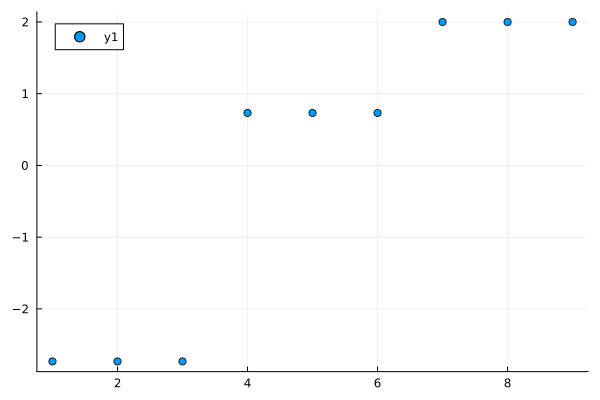

In [43]:
ϵ_sp, λ_sp = eigen(Matrix(matrix))
scatter(real(ϵ_sp))

In [44]:
HardCore = true
H_proj_hardcore, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore);

In [45]:
ϵ_hard_core, psi_hard_core = eigenstates(H_proj_hardcore);

In [46]:
HardCore = false
H_proj_finite, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore);

In [47]:
ϵ_finite, psi_finite = eigenstates(H_proj_finite);

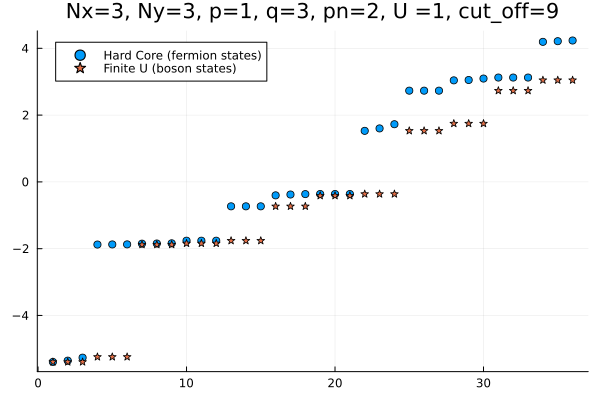

In [48]:
n=1
m=36
scatter(ϵ_hard_core[n:m], label="Hard Core (fermion states)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off)")
scatter!(ϵ_finite[n:m], label="Finite U (boson states)",marker=:star)

# WHEN **U IS ENOUGH BIGGER**, FINITE ENERGIES DON'T CLOSE TO HARD-CORE ENERGIES JUST FOR HOFSTADTER MODEL !

# WITHOUT PROJECTION

In [49]:
HardCore = true
H_full_hard_core, basis_mb = H_Hubbard(N, pn, matrix, HardCore);

In [50]:
E_full_hard_core, psi_full_hard_core = eigenstates(dense(H_full_hard_core));

In [51]:
HardCore = false
H_full_finite, basis_mb =  H_Hubbard(N, pn, matrix, HardCore);

In [52]:
E_full_finite, psi_full_finite = eigenstates(dense(H_full_finite));

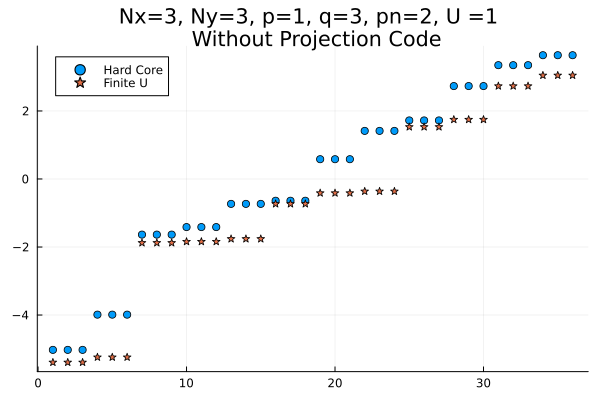

In [ ]:
n=1
m=36
scatter(E_full_hard_core[n:m], label="Hard Core", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n Without Projection Code")
scatter!(E_full_finite[n:m], label="Finite U",marker=:star)

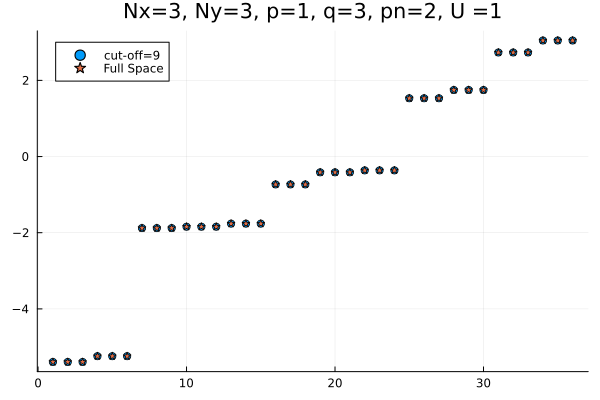

In [54]:
n=1
m=36
scatter(ϵ_finite[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(E_full_finite[n:m], label="Full Space",marker=:star)

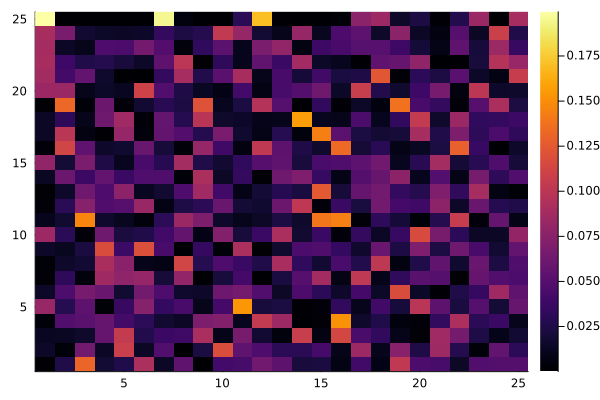

In [5]:
heatmap(abs.(λ_sp).^2)

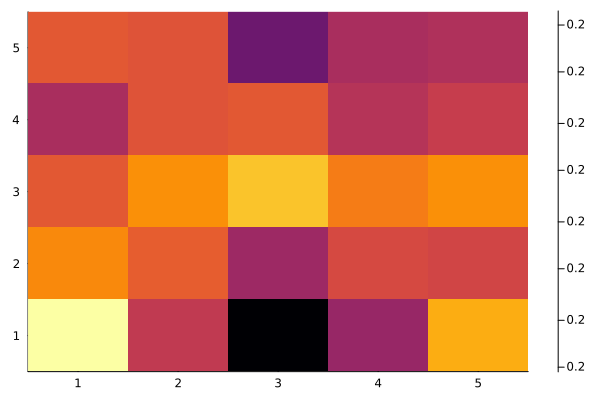

GKS: Possible loss of precision in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY
GKS: Rectangle definition is invalid in routine CELLARRAY


In [7]:
heatmap(reshape(sum(abs.(λ_sp[:,1:5]).^2,dims=2),(Nx,Ny)))

In [8]:
reshape(sum(abs.(λ_sp[:,1:5]).^2,dims=2),(Nx,Ny))

5×5 Matrix{Float64}:
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2

In [9]:
#= # PROJECTION CODE
matrix = Hofstadter_SP(Nx, Ny, p / q, 0);
H = Sp_Op(N, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N, H, Cut_Off)
lim = 1
#! H_MB_sub, basis_cut_mb = H_Kin_MB(Sub_Basis, PN, H_sp_Sub, lim)
H_MB_sub, basis_cut_mb = H_Kin_MB(Sub_Basis, pn, H_sp_Sub, lim)
#! basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN, lim)
#!! basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, pn, lim)
basis_mb_sub = boson_mb_basis(Sub_Basis, pn)
#! H_Total_sub = H_Total_Sub(P, Pt, basis_cut_mb, Cut_Off, U, H_MB_sub);
#basis_mb, basis_sp = get_Bosonic_MB_Basis(N, pn, lim)
H_Int = Hubbard_Interaction_fixed_prtcl(basis_sp)
H_Int_Sub = Hubbard_Int_fixed_prtc_sub(H_Int, P, Pt, Sub_Basis, basis_mb_sub)
#! H_Total_sub = H_Total_fixed_prtcl(basis_sp, basis_mb, H_MB_sub)
H_Total = H_MB_sub + H_Int_Sub 
H_Total = (H_Total'+H_Total)/2 =#

In [10]:
#= # WITHOUT PROJECTION
matrix = Hofstadter_SP(Nx, Ny, p / q, 0);
H = Sp_Op(N, matrix)
lim = 1
basis_mb, basis_sp = get_Bosonic_MB_Basis(N, pn, lim)
H_MB, basis_mb = H_Kin_MB(basis_sp, pn, H, lim)
H_Int = Hubbard_Interaction_Full(basis_sp, basis_mb)
H_Total_full = H_MB + H_Int
H_Total_full = (H_Total_full'+H_Total_full)/2 =#

In [74]:
H_MB

Operator(dim=136x136)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:136)sparse([2, 4, 5, 13, 1, 3, 6, 14, 17, 19  …  121, 125, 129, 133, 134, 136, 58, 126, 130, 135], [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29

In [75]:
H_Int

Operator(dim=256x256)
  basis: [NLevel(N=16) ⊗ NLevel(N=16)]sparse([1, 18, 35, 52, 69, 86, 103, 120, 137, 154, 171, 188, 205, 222, 239, 256], [1, 18, 35, 52, 69, 86, 103, 120, 137, 154, 171, 188, 205, 222, 239, 256], ComplexF64[10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im, 10.0 + 0.0im], 256, 256)

In [9]:
states_mb = bosonstates(basis_sp, pn) 

136-element QuantumOpticsBase.SortedVector{QuantumOpticsBase.OccupationNumbers{QuantumOpticsBase.BosonStatistics, Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}:
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 0

In [5]:
basis_mb = ManyBodyBasis(basis_sp, states_mb)

ManyBody(onebodybasis=NLevel(N=16), states:153)

In [6]:
H1_MB = get_mb_op(basis_mb, H)

Operator(dim=153x153)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:153)sparse([2, 4, 5, 13, 1, 3, 6, 14, 18, 20  …  147, 152, 61, 137, 142, 149, 62, 138, 143, 150], [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30,

In [7]:
H_Total

Operator(dim=136x136)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:136)
     20.0+0.0im  -1.41421+0.0im   0.0+0.0im  …      0.0+0.0im
 -1.41421+0.0im       0.0+0.0im  -1.0+0.0im         0.0+0.0im
      0.0+0.0im      -1.0+0.0im   0.0+0.0im         0.0+0.0im
 -1.41421+0.0im       0.0+0.0im  -1.0+0.0im         0.0+0.0im
 -1.41421+0.0im       0.0+0.0im   0.0+0.0im         0.0+0.0im
      0.0+0.0im      -1.0+0.0im   0.0+0.0im  …      0.0+0.0im
      0.0+0.0im       0.0+0.0im  -1.0+0.0im         0.0+0.0im
      0.0+0.0im       0.0+0.0im   0.0+0.0im         0.0+0.0im
      0.0+0.0im       0.0+0.0im   0.0+0.0im         0.0+0.0im
      0.0+0.0im       0.0+0.0im   0.0+0.0im         0.0+0.0im
         ⋮                                   ⋱         ⋮
      0.0+0.0im       0.0+0.0im   0.0+0.0im         0.0+0.0im
      0.0+0.0im       0.0+0.0im   0.0+0.0im         0.0+0.0im
      0.0+0.0im       0.0+0.0im   0.0+0.0im     2.6e-16+1.41421im
      0.0+0.0im       0.0+0.0im   0.0+0.0im  …      0.

In [79]:
E, λ = eigenstates(H_Total);
E_full, λ_full = eigenstates(dense(H_Total_full))
#ϵ_fixed, λ_fixed =  fixed_pn_sector(pn, E, λ, basis_cut_mb);

([-5.634606030128044, -5.634606030128041, -5.409036909199342, -5.409036909199339, -5.154552081280172, -5.154552081280172, -5.154552081280171, -5.15455208128017, -4.84769342072035, -4.847693420720348  …  20.392304845413218, 20.392304845413292, 20.404078091583546, 20.404078091583617, 20.599934247217476, 20.599934247217476, 20.599934247217497, 20.599934247217515, 20.6842457604783, 20.684245760478316], Ket{ManyBodyBasis{NLevelBasis{Int64}, QuantumOpticsBase.SortedVector{QuantumOpticsBase.OccupationNumbers{QuantumOpticsBase.BosonStatistics, Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}, UInt64}, Vector{ComplexF64}}[Ket(dim=136)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:136)
  0.00025582650362736 - 0.00021216091852943im
  0.05969797082452803 - 0.00096142861767772im
  0.09230091000991981 - 0.00496673242646372im
  0.05969797082452814 - 0.00096142861767781im
  -0.0573793635762891 - 0.00096142861767777im
  0.04041354025602649 - 0.0446483696065399im
   0.07032184520752

In [80]:
XX = []
for i in 1:length(E)
    push!(XX, round(expect(number(basis_cut_mb), λ[i])))
end
findall(x->x==1, XX)

7-element Vector{Int64}:
  14
  26
  85
  86
 116
 117
 119

In [81]:
153-8

145

In [46]:
ϵ_fixed

145-element Vector{Any}:
 -5.634606030128044
 -5.634606030128042
 -5.409036909199342
 -5.409036909199339
 -5.1545520812801735
 -5.154552081280173
 -5.154552081280172
 -5.154552081280169
 -4.84769342072035
 -4.847693420720347
  ⋮
 20.392304845413307
 20.404078091583592
 20.404078091583617
 20.599934247217487
 20.59993424721751
 20.59993424721753
 20.599934247217533
 20.68424576047832
 20.68424576047833

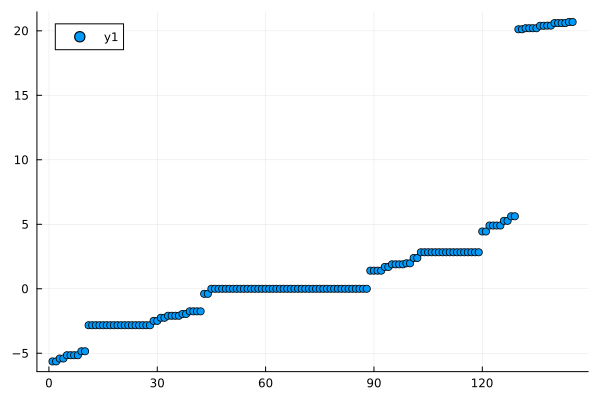

In [47]:
scatter(ϵ_fixed)

In [52]:
E, λ = eigenstates(H_Total);

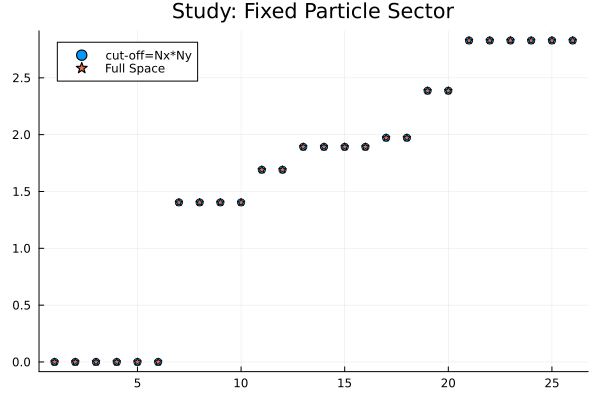

In [95]:
m = 75
n = 100
scatter(E[m:n], label="cut-off=Nx*Ny", title="Study: Fixed Particle Sector")
scatter!(E_full[m:n], label="Full Space", markershape=:star)